In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [102]:
y=pd.read_csv("AAPL_quarterly_financials.csv")

In [103]:
y.index=y.name

In [104]:
y=pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [105]:
y.index=pd.to_datetime(y.index)

In [106]:
y=y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [22]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [107]:
from pytrends.request import TrendReq

In [108]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession","Samsung","Interest Rate", "New Phone","Buy iPhone","Sell iPhone" ,"Taylor Swift Tickets","Hospital","UCLA"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [112]:
X=df.resample("Q").mean()
temp = pd.concat([y,X],axis=1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of 0.01. Plot a bar chart.

In [145]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_scaled,y)
coefficients = lasso.coef_

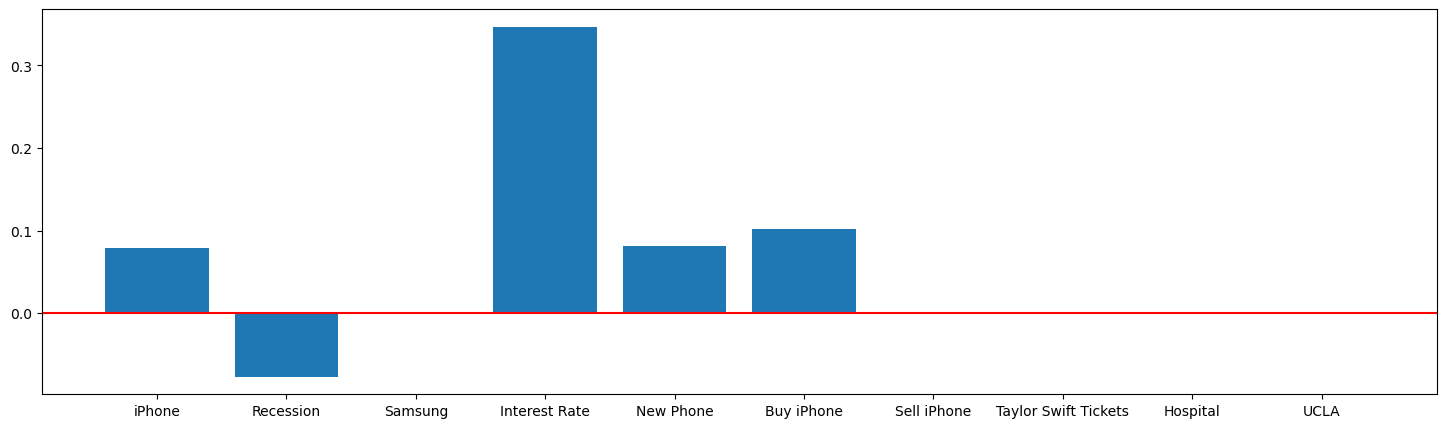

In [146]:
plt.figure(figsize = (18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0.,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

I think these coeffecients make sense. The relevent metrics we chose mostly have non-zero coeffecients, while the unrelevent metrics' coeffecients shrink to zero. To be more specific, interest rate, buy iPhone and iPhone have the highest contribution to the prediction of the earnings, which also make sense.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?